##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [32]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gesture Recognizer with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to recognize hand gestures in images.

## Preparation

Let's start with installing MediaPipe.

In [33]:
# !pip install -q mediapipe

Then download an off-the-shelf model. This model can recognize 7 hand gestures: 👍, 👎, ✌️, ☝️, ✊, 👋, 🤟

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/gesture_recognizer#models) for more details about the model.

In [34]:
# !wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

## Visualization Utilities

In [35]:
#@markdown We implemented some functions to visualize the gesture recognition results. <br/> Run the following cell to activate the functions.
from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment': 'center'},
                  pad=int(titlesize / 1.5))
    return (subplot[0], subplot[1], subplot[2] + 1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot = (rows, cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE, FIGSIZE / cols * rows))
    else:
        plt.figure(figsize=(FIGSIZE / rows * cols, FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[:rows * cols], gestures[:rows * cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE * SPACING / max(rows, cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
            hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
            hand_landmarks_proto.landmark.extend([
                landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
            ])

            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks_proto,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

## Download test images

Let's grab some test images that we'll use later. The images ([1](https://pixabay.com/photos/idea-pointing-raise-hand-raise-3082824/), [2](https://pixabay.com/photos/thumbs-up-happy-positive-woman-2649310/), [3](https://pixabay.com/photos/epidemic-disease-coronavirus-5082474/), [4](https://pixabay.com/photos/thumbs-down-disapprove-gesture-6744094/)) are from Pixabay.

In [36]:
# import urllib
# 
# IMAGE_FILENAMES = ['thumbs_down.jpg', 'victory.jpg', 'thumbs_up.jpg', 'pointing_up.jpg']
# 
# for name in IMAGE_FILENAMES:
#   url = f'https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/{name}'
#   urllib.request.urlretrieve(url, name)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [37]:
# from google.colab import files
# uploaded = files.upload()
# 
# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)
# IMAGE_FILENAMES = list(uploaded.keys())
# 
# print('Uploaded files:', IMAGE_FILENAMES)

Loading all images in dataset

In [45]:
import os
import params
import json

# ROOT = os.path.dirname(__file__)
IMAGE_FILENAMES = []
with open('./data/data.json', 'r') as f:
    IMAGE_FILENAMES.extend(json.load(f))

print(IMAGE_FILENAMES)

[{'filename': 'photo_8_2024-03-05_13-34-52.jpg', 'label': 1}, {'filename': 'LeTan_Camera 01_20240305090130_1794939.jpg', 'label': 1}, {'filename': 'photo_5_2024-03-05_08-59-49.jpg', 'label': 1}, {'filename': 'photo_7_2024-03-05_09-00-14.jpg', 'label': 1}, {'filename': 'Louge_Camera 09_20240305083738_362849.jpg', 'label': 1}, {'filename': 'LeTan_Camera 01_20240305083345_129638.jpg', 'label': 1}, {'filename': 'photo_2_2024-03-05_08-59-31.jpg', 'label': 1}, {'filename': 'photo_2_2024-03-05_08-58-23.jpg', 'label': 1}, {'filename': 'ClassRoom3_Camera1_20240305091202_2426881.jpg', 'label': 1}, {'filename': 'photo_7_2024-03-05_09-00-20.jpg', 'label': 1}, {'filename': 'photo_4_2024-03-05_08-59-24.jpg', 'label': 1}, {'filename': 'photo_8_2024-03-05_08-59-13.jpg', 'label': 1}, {'filename': 'photo_3_2024-03-05_13-34-52.jpg', 'label': 1}, {'filename': 'photo_3_2024-03-05_09-00-26.jpg', 'label': 1}, {'filename': 'photo_7_2024-03-05_09-00-31.jpg', 'label': 1}, {'filename': 'photo_8_2024-03-05_08-58-

Then let's check out the images.

In [46]:
import cv2
import math

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480


def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h / (w / DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w / (h / DESIRED_HEIGHT)), DESIRED_HEIGHT))
    cv2.imshow("window", img)


# Preview the images.
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
    print(name)
    resize_and_show(image)

TypeError: Can't convert object to 'str' for 'filename'

## Running inference and visualizing the results

Here are the steps to run gesture recognizer using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/gesture_recognizer/python) to learn more about configuration options that this solution supports.

*Note: Gesture Recognizer also returns the hand landmark it detects from the image, together with other useful information such as whether the hand(s) detected are left hand or right hand.*

In [47]:
# Total samples
total_images = len(IMAGE_FILENAMES)
print(total_images)

I0000 00:00:1709633454.322918  273956 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1709633454.323984  317408 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 21.2.6), renderer: Mesa Intel(R) Graphics (ADL-S GT1)
W0000 00:00:1709633454.324193  273956 gesture_recognizer_graph.cc:129] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.
I0000 00:00:1709633454.324856  273956 hand_gesture_recognizer_graph.cc:250] Custom gesture classifier is not defined.


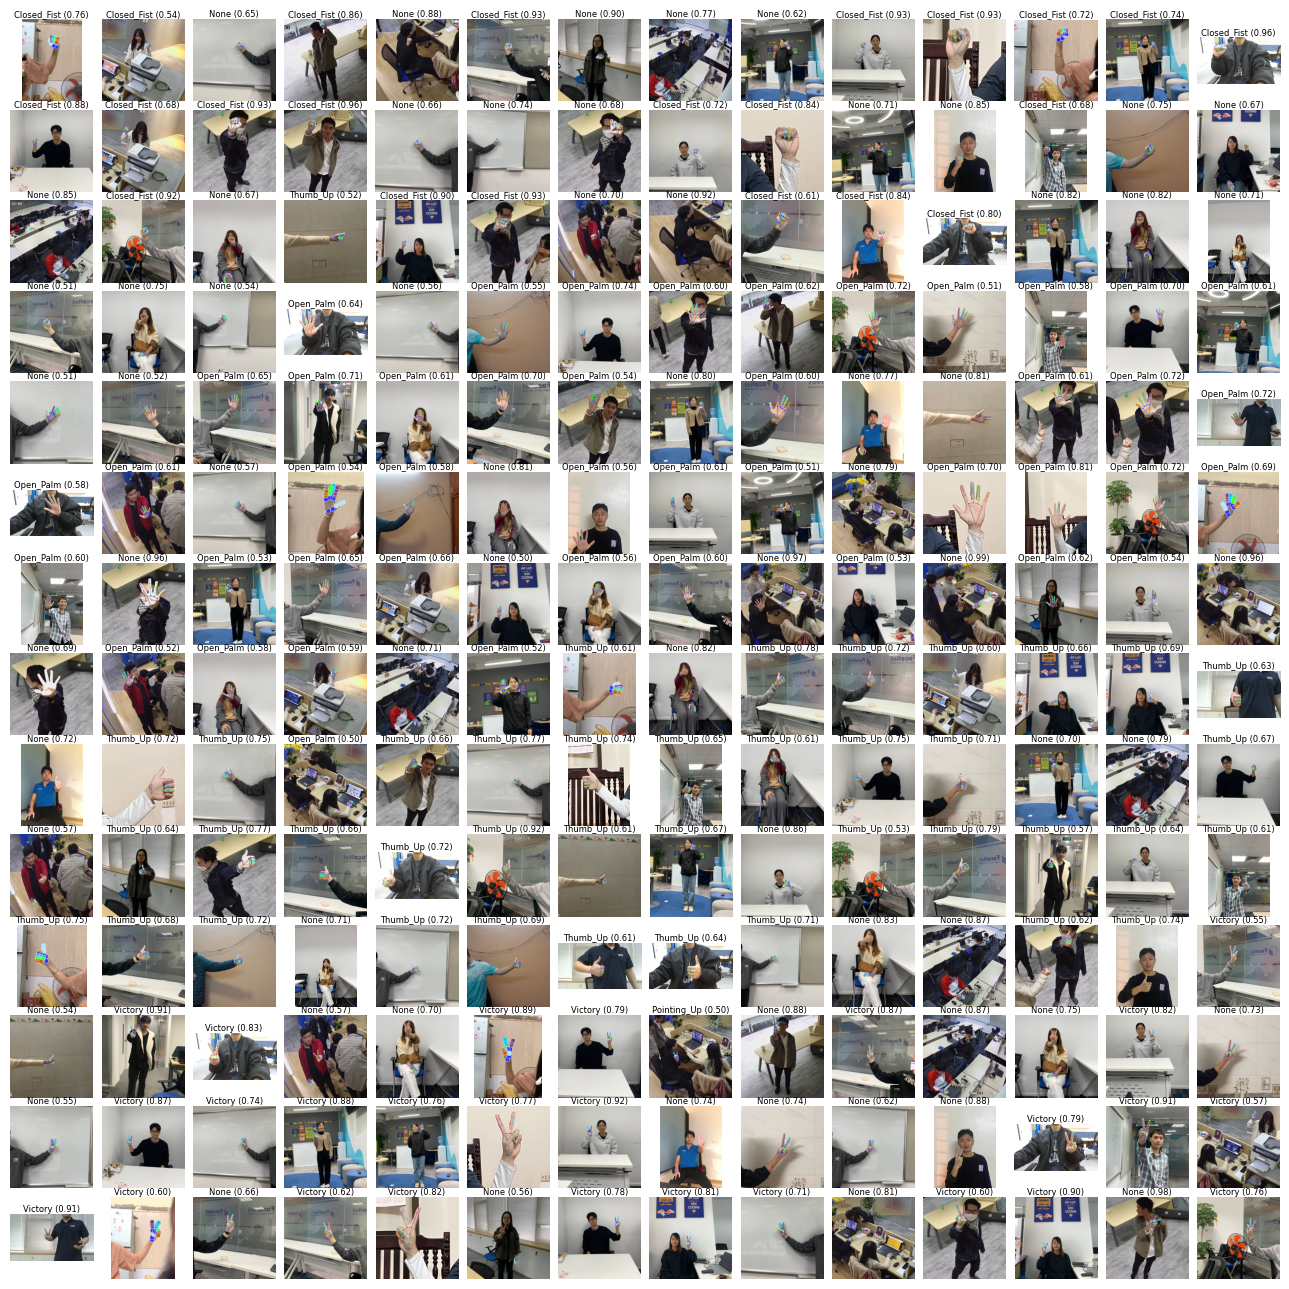

Number of images: 246, Number of undetected images: 42/246, Number of wrong label images: 71/204
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67        44
           2       0.98      0.72      0.83        60
           3       0.00      0.00      0.00         0
           5       0.97      0.80      0.88        49
           6       1.00      0.57      0.72        51

    accuracy                           0.65       204
   macro avg       0.66      0.43      0.52       204
weighted avg       0.99      0.65      0.78       204


/home/ubuntu/vuanhtuan/facenet-aihub/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/vuanhtuan/facenet-aihub/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/vuanhtuan/facenet-aihub/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [49]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from sklearn.metrics import classification_report

# STEP 2: Create an GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options, num_hands=1)
recognizer = vision.GestureRecognizer.create_from_options(options)

not_detected = 0
wrong_label = 0

images = []
results = []
idx = 0

y_pred = []
y_true = []

for image_file_name in IMAGE_FILENAMES:
    # STEP 3: Load the input image.
    filename = './data/gesture/' + str(image_file_name['label']) + "/" + image_file_name['filename']
    image = mp.Image.create_from_file(filename)

    # STEP 4: Recognize gestures in the input image.
    recognition_result = recognizer.recognize(image)

    if len(recognition_result.gestures) == 0:
        not_detected += 1
        continue
    else:
        # STEP 5: Process the result. In this case, visualize it.
        lb_str = recognition_result.gestures[0][0].category_name
        lb = params.LABELS[lb_str]
        y_pred.append(lb)
        y_true.append(image_file_name['label'])
        if lb != image_file_name['label']:
            wrong_label += 1
        images.append(image)
        top_gesture = recognition_result.gestures[0][0]
        hand_landmarks = recognition_result.hand_landmarks
        results.append((top_gesture, hand_landmarks))

display_batch_of_images_with_gestures_and_hand_landmarks(images, results)

print(f"Number of images: {total_images}, Number of undetected images: {not_detected}/{total_images}, Number of wrong label images: {wrong_label}/{total_images-not_detected}")

print(classification_report(y_true, y_pred))

In [41]:
# import cv2
# img_path = './data/photo_2024-03-05_10-31-54.jpg'
# img = cv2.imread(img_path)

In [44]:
# # generate image resource .json
# import os
# import json
# import params
# 
# images = []
# 
# for lb, v in params.LABELS.items():
#     if not os.path.exists(f'./data/gesture/{v}'):
#         continue
#     else:
#         IMAGE_FILENAMES = []
#         for _, _, files in os.walk(f'./data/gesture/{v}'):
#             IMAGE_FILENAMES = files
#         for filename in IMAGE_FILENAMES:
#             image = {
#                 "filename": filename,
#                 "label": v
#             }
#             images.append(image)
# 
# 
# with open('./data/data.json', 'w') as f:
#     f.write(json.dumps(images))